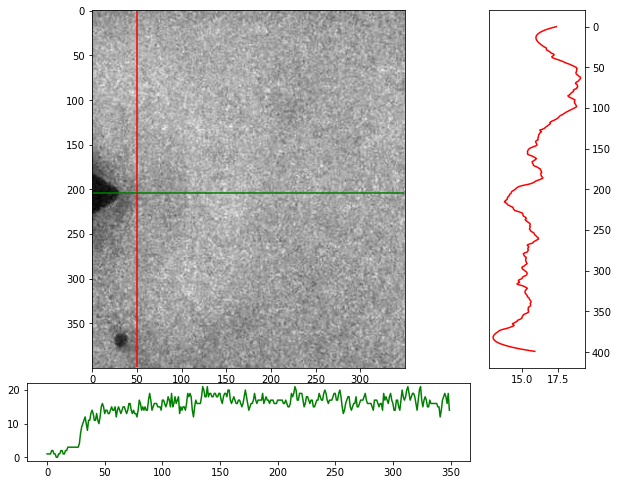

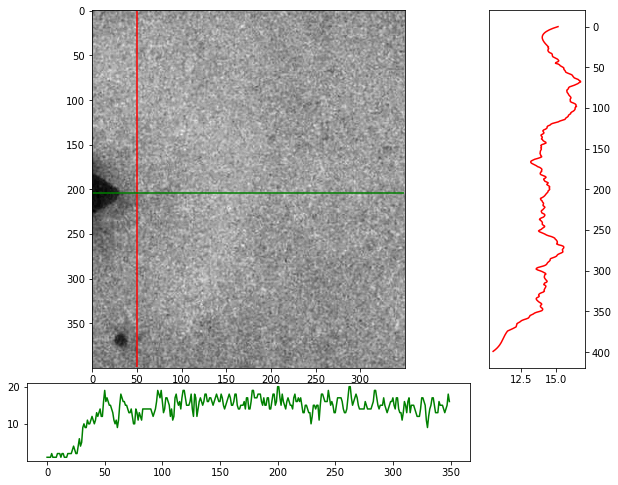

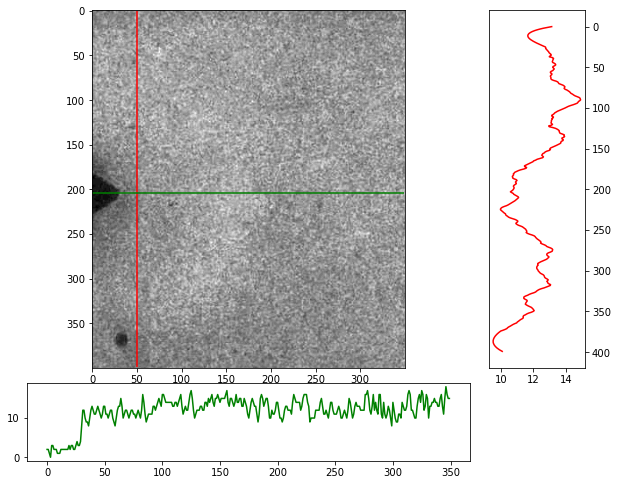

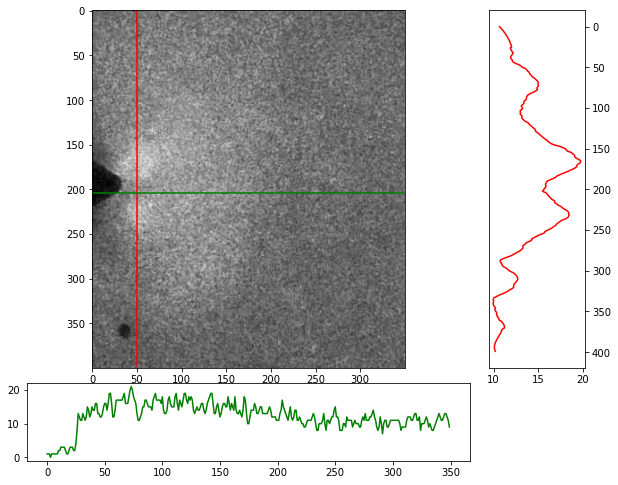

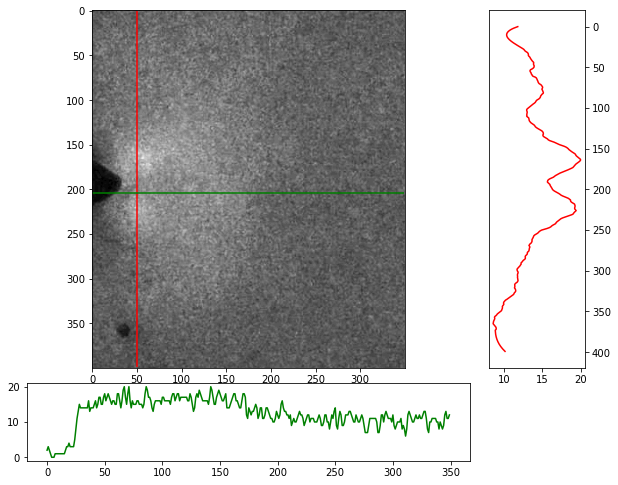

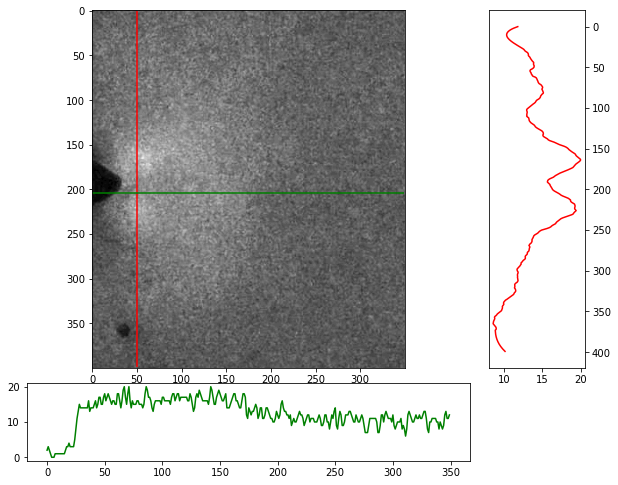

In [56]:
import numpy as np
import DIC.DIC as dic
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cv2
from scipy.signal import savgol_filter
path = r'G:\AL IMAGE\CTS_UVoff_mobile'
save_path = r'G:\AL IMAGE'
image = dic.load_file(path)

y_point = 204
x_point = 50


# ml_avg = savgol_filter(ml_a[:9438],2001,1)

for key in image:
    value=image[key][300:700, 1100:1450]
    fig = plt.figure(figsize=(10, 10))
    gs = GridSpec(nrows=6, ncols=5)
    # First axes
    ax0 = fig.add_subplot(gs[0:4, 0:4])
    ax0.imshow(value,cmap='gray')
    ax0.vlines(x_point,0,np.shape(value)[0]-1, color='red')
    ax0.hlines(y_point,0,np.shape(value)[1]-1, color='green')
    # ax0.axis('off')
    # v axes
    ax1 = fig.add_subplot(gs[0:4, 4])
    # ax1.plot(value[:,x_point],np.arange(len(value[:,x_point])),color='red')
    ax1.plot(savgol_filter(value[:,x_point],51,3),np.arange(len(value[:,x_point])),color='red')
    ax1.yaxis.set_label_position("right")
    ax1.yaxis.tick_right()
    plt.gca().invert_yaxis()
    # u axes
    ax2 = fig.add_subplot(gs[4, 0:4])
    ax2.plot(value[y_point,:], color='green')
    # ax2.plot(savgol_filter(value[:,y_point],31,2), color='green')

    plt.savefig(save_path+'/%sProfiles_filter_win51cor3.png'%key, dpi=300)
    plt.close()

